In [4]:
import gc

gc.collect()

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from math import pi

## Great Barrier Region


In [ ]:
import codecs
import csv

try:
    # Python 3
    from urllib.request import urlopen
except ImportError:
    # Python 2
    from urllib2 import urlopen

# The URL to the collection (as comma-separated values).
collection_url = "https://geoserver-portal.aodn.org.au/geoserver/ows?typeName=imos:anmn_nrs_dar_yon_timeseries_data&SERVICE=WFS&outputFormat=csv&REQUEST=GetFeature&VERSION=1.0.0&CQL_FILTER=(LONGNAME%20LIKE%20'actual%20depth'%20OR%20LONGNAME%20LIKE%20'air_pressure'%20OR%20LONGNAME%20LIKE%20'air_temperature'%20OR%20LONGNAME%20LIKE%20'current_direction'%20OR%20LONGNAME%20LIKE%20'current_magnitude'%20OR%20LONGNAME%20LIKE%20'hail_duration'%20OR%20LONGNAME%20LIKE%20'mass_concentration_of_chlorophyll_in_sea_water'%20OR%20LONGNAME%20LIKE%20'mole_concentration_of_dissolved_molecular_oxygen_in_sea_water'%20OR%20LONGNAME%20LIKE%20'percentage_relative_humidity'%20OR%20LONGNAME%20LIKE%20'rainfall%20duration'%20OR%20LONGNAME%20LIKE%20'sea_water_electrical_conductivity'%20OR%20LONGNAME%20LIKE%20'sea_water_pressure'%20OR%20LONGNAME%20LIKE%20'sea_water_salinity'%20OR%20LONGNAME%20LIKE%20'sea_water_temperature'%20OR%20LONGNAME%20LIKE%20'sea_water_turbidity'%20OR%20LONGNAME%20LIKE%20'wind_speed_max_30min'%20OR%20LONGNAME%20LIKE%20'wind_speed_min_30min')%20AND%20(platform_code%20LIKE%20'Yongala')&userId=Guest"

# Fetch data...
response = urlopen(collection_url)

csvfile = csv.reader(codecs.iterdecode(response, "utf-8"))
# Iterate on data...
with open(
    "/home/jovyan/visualization/dhiraj/data/complete/IMOS_ANMN_National_Reference_Stations_Yongala_Near_real-time_meteorology_and_oceanographical_data.csv",
    "w",
) as file:
    writer = csv.writer(file)
    for row in csvfile:
        writer.writerow(row)

In [233]:
# This needs to be done just once

# filename = "/home/jovyan/visualization/dhiraj/data/complete/IMOS_ANMN_National_Reference_Stations_Yongala_Near_real-time_meteorology_and_oceanographical_data.csv"
# df = pd.read_csv(filename, delimiter=",", low_memory=False)

# # data cleaning
# df = df.drop("FID", axis=1)
# # df['channel_id'].nunique()
# df = df.drop("channel_id", axis=1)
# df = df.drop("url", axis=1)
# df = df.drop("platform_code", axis=1)
# df = df.drop("site_code", axis=1)
# df = df.drop("VARNAME", axis=1)
# # df = df.drop("LONGNAME", axis=1)
# df = df.drop("geom", axis=1)
# df = df.drop("LATITUDE", axis=1) # -19.3037
# df = df.drop("LONGITUDE", axis=1)  # 147.6204
# df = df.drop("NOMINAL_DEPTH", axis=1)
# df = df.drop("VALUES_quality_control", axis=1)
# df.dropna(inplace=True)
# df["TIME"] = pd.to_datetime(df["TIME"])
# filename = "/home/jovyan/visualization/dhiraj/data/clean/IMOS_ANMN_National_Reference_Stations_Yongala_Near_real-time_meteorology_and_oceanographical_data.csv"
# df.to_csv(filename, index=False)

In [219]:
# df["LONGNAME"].unique()

array(['air_pressure', 'air_temperature', 'sea_water_temperature',
       'rainfall duration', 'wind_speed_max_30min',
       'wind_speed_min_30min', 'percentage_relative_humidity',
       'mass_concentration_of_chlorophyll_in_sea_water',
       'sea_water_salinity', 'sea_water_turbidity', 'sea_water_pressure',
       'mole_concentration_of_dissolved_molecular_oxygen_in_sea_water'],
      dtype=object)

In [234]:
# df.columns

Index(['TIME', 'VALUES', 'LONGNAME'], dtype='object')

In [235]:
# df.shape

(3186412, 3)

In [243]:
# filename = "/home/jovyan/visualization/dhiraj/data/clean/IMOS_ANMN_National_Reference_Stations_Yongala_Near_real-time_meteorology_and_oceanographical_data.csv"
# df = pd.read_csv(filename, delimiter=",", low_memory=False)

In [244]:
# creating the csv for each parameter as the data is stored in rows.
for i in df["LONGNAME"].unique():
    if isinstance(i, str):
        df_temp = df[df["LONGNAME"] == i]
        df_temp = df_temp.drop("LONGNAME", axis=1)
        filename_temp = "/home/jovyan/visualization/dhiraj/data/clean/" + i + ".csv"
        df_temp.to_csv(filename_temp, index=False)

### Air Temperature


In [179]:
filename = "/home/jovyan/visualization/dhiraj/data/clean/air_temperature.csv"
df = pd.read_csv(filename)

df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month

df["YEAR"].value_counts()

YEAR
2021    52389
2020    52370
2022    52263
2018    52114
2019    52099
2017    50366
2016    41463
2015    40961
2014    35146
2023    18886
2013    13524
2010     6755
2011     2263
Name: count, dtype: int64

In [72]:
df_2022 = df[df["YEAR"] == 2022]
df_2022 = df_2022.reset_index(drop=True)
df_2022.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2022["WEEK"] = pd.to_datetime(df_2022["TIME"]).dt.strftime("%V")
df_2022_weekly = (
    df_2022[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2021 = df[df["YEAR"] == 2021]
df_2021 = df_2021.reset_index(drop=True)
df_2021.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2021["WEEK"] = pd.to_datetime(df_2021["TIME"]).dt.strftime("%V")
df_2021_weekly = (
    df_2021[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2020 = df[df["YEAR"] == 2020]
df_2020 = df_2020.reset_index(drop=True)
df_2020.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2020["WEEK"] = pd.to_datetime(df_2020["TIME"]).dt.strftime("%V")
df_2020_weekly = (
    df_2020[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2019 = df[df["YEAR"] == 2019]
df_2019 = df_2019.reset_index(drop=True)
df_2019.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2019["WEEK"] = pd.to_datetime(df_2019["TIME"]).dt.strftime("%V")
df_2019_weekly = (
    df_2019[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2018 = df[df["YEAR"] == 2018]
df_2018 = df_2018.reset_index(drop=True)
df_2018.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2018["WEEK"] = pd.to_datetime(df_2018["TIME"]).dt.strftime("%V")
df_2018_weekly = (
    df_2018[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2017 = df[df["YEAR"] == 2017]
df_2017 = df_2017.reset_index(drop=True)
df_2017.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2017["WEEK"] = pd.to_datetime(df_2017["TIME"]).dt.strftime("%V")
df_2017_weekly = (
    df_2017[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2016 = df[df["YEAR"] == 2016]
df_2016 = df_2016.reset_index(drop=True)
df_2016.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2016["WEEK"] = pd.to_datetime(df_2016["TIME"]).dt.strftime("%V")
df_2016_weekly = (
    df_2016[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2015 = df[df["YEAR"] == 2015]
df_2015 = df_2015.reset_index(drop=True)
df_2015.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2015["WEEK"] = pd.to_datetime(df_2015["TIME"]).dt.strftime("%V")
df_2015_weekly = (
    df_2015[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

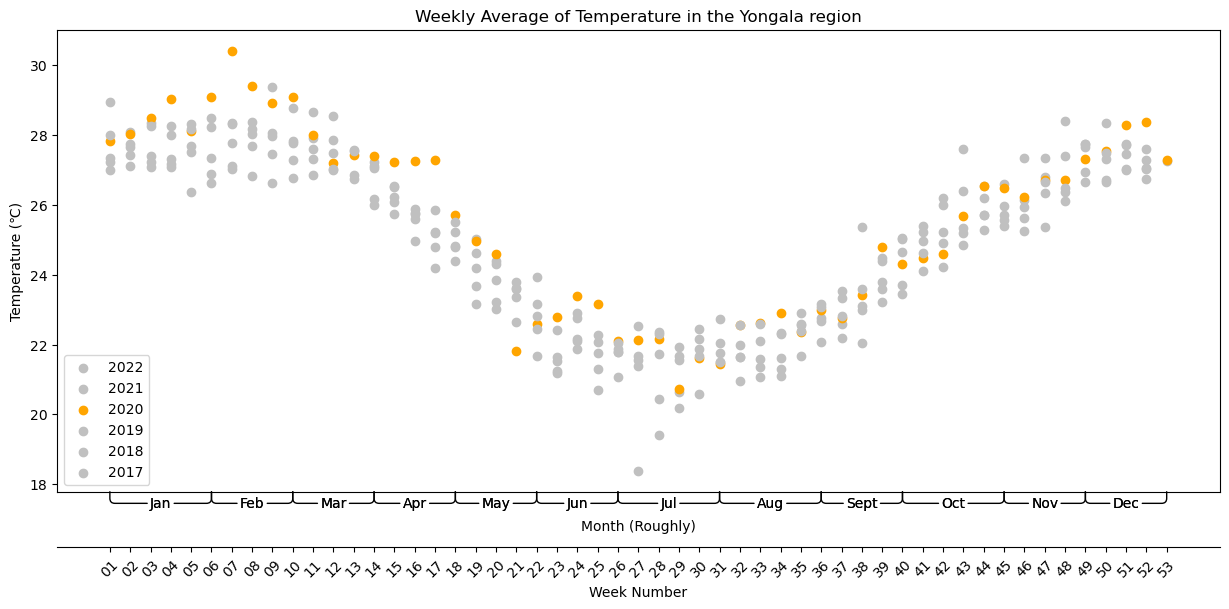

In [84]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(df_2022_weekly["WEEK"], df_2022_weekly["VALUES"], label="2022", c="silver")
ax.scatter(df_2021_weekly["WEEK"], df_2021_weekly["VALUES"], label="2021", c="silver")
ax.scatter(df_2020_weekly["WEEK"], df_2020_weekly["VALUES"], label="2020", c="orange")
ax.scatter(df_2019_weekly["WEEK"], df_2019_weekly["VALUES"], label="2019", c="silver")
ax.scatter(df_2018_weekly["WEEK"], df_2018_weekly["VALUES"], label="2018", c="silver")
# ax.scatter(df_2017_weekly['WEEK'], df_2017_weekly['VALUES'], label='2017', c='silver');
# ax.scatter(df_2016_weekly['WEEK'], df_2016_weekly['VALUES'], label='2016');
# ax.scatter(df_2015_weekly['WEEK'], df_2015_weekly['VALUES'], label='2015');
ax.legend()
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Week Number")
ax.set_ylabel("Temperature (\u2103)")
ax.set_title("Weekly Average of Temperature in the Yongala region")

groups = [
    ("Jan", (0, int(df_2022_weekly["WEEK"][4]))),
    ("Feb", (int(df_2022_weekly["WEEK"][4]), int(df_2022_weekly["WEEK"][8]))),
    ("Mar", (int(df_2022_weekly["WEEK"][8]), int(df_2022_weekly["WEEK"][12]))),
    ("Apr", (int(df_2022_weekly["WEEK"][12]), int(df_2022_weekly["WEEK"][16]))),
    ("May", (int(df_2022_weekly["WEEK"][16]), int(df_2022_weekly["WEEK"][20]))),
    ("Jun", (int(df_2022_weekly["WEEK"][20]), int(df_2022_weekly["WEEK"][24]))),
    ("Jul", (int(df_2022_weekly["WEEK"][24]), int(df_2022_weekly["WEEK"][29]))),
    ("Aug", (int(df_2022_weekly["WEEK"][29]), int(df_2022_weekly["WEEK"][34]))),
    ("Sept", (int(df_2022_weekly["WEEK"][34]), int(df_2022_weekly["WEEK"][38]))),
    ("Oct", (int(df_2022_weekly["WEEK"][38]), int(df_2022_weekly["WEEK"][43]))),
    ("Nov", (int(df_2022_weekly["WEEK"][43]), int(df_2022_weekly["WEEK"][47]))),
    ("Dec", (int(df_2022_weekly["WEEK"][47]), int(df_2022_weekly["WEEK"][51]))),
]
ax.spines["bottom"].set_position(("outward", 40))

make_second_bottom_spine(label="Month (Roughly)")

for name, xspan in groups:
    annotate_group(name, xspan)

##### Some findings:

- The temperature in 2020 (Jan and Feb) was the highest temperature recorded in last 120 years. This had direct affects on the bleaching in the Great Barrier Reef.
- July of 2022 had witnessed much lower temperature than the previous years (in the same month). 2022 also saw lot of bleaching.


In [180]:
df_2017 = df[df["YEAR"] == 2017]
df_2017 = df_2017.reset_index(drop=True)
df_2017.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2017["WEEK"] = pd.to_datetime(df_2017["TIME"]).dt.strftime("%V")
df_2017_weekly = (
    df_2017[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2016 = df[df["YEAR"] == 2016]
df_2016 = df_2016.reset_index(drop=True)
df_2016.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2016["WEEK"] = pd.to_datetime(df_2016["TIME"]).dt.strftime("%V")
df_2016_weekly = (
    df_2016[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2015 = df[df["YEAR"] == 2015]
df_2015 = df_2015.reset_index(drop=True)
df_2015.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2015["WEEK"] = pd.to_datetime(df_2015["TIME"]).dt.strftime("%V")
df_2015_weekly = (
    df_2015[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

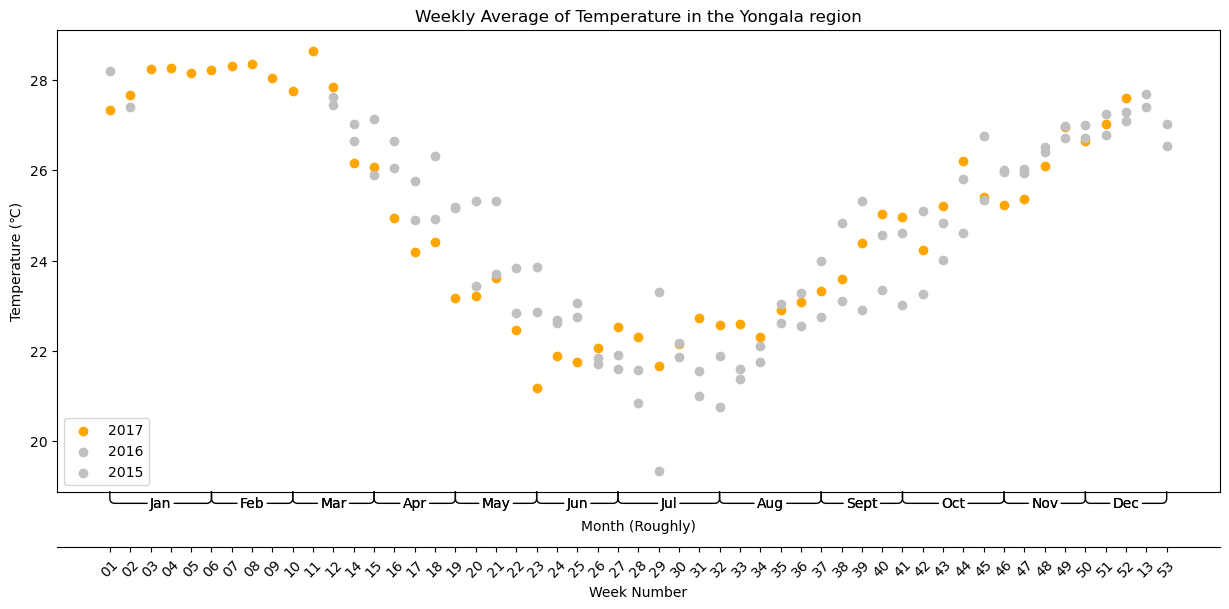

In [183]:
fig, ax = plt.subplots(figsize=(15, 6))

# ax.scatter(df_2018_weekly['WEEK'], df_2018_weekly['VALUES'], label='2018', c='silver');
ax.scatter(df_2017_weekly["WEEK"], df_2017_weekly["VALUES"], label="2017", c="orange")
ax.scatter(df_2016_weekly["WEEK"], df_2016_weekly["VALUES"], label="2016", c="silver")
ax.scatter(df_2015_weekly["WEEK"], df_2015_weekly["VALUES"], label="2015", c="silver")
ax.legend()
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Week Number")
ax.set_ylabel("Temperature (\u2103)")
ax.set_title("Weekly Average of Temperature in the Yongala region")

groups = [
    ("Jan", (0, int(df_2022_weekly["WEEK"][4]))),
    ("Feb", (int(df_2022_weekly["WEEK"][4]), int(df_2022_weekly["WEEK"][8]))),
    ("Mar", (int(df_2022_weekly["WEEK"][8]), int(df_2022_weekly["WEEK"][12]))),
    ("Apr", (int(df_2022_weekly["WEEK"][12]), int(df_2022_weekly["WEEK"][16]))),
    ("May", (int(df_2022_weekly["WEEK"][16]), int(df_2022_weekly["WEEK"][20]))),
    ("Jun", (int(df_2022_weekly["WEEK"][20]), int(df_2022_weekly["WEEK"][24]))),
    ("Jul", (int(df_2022_weekly["WEEK"][24]), int(df_2022_weekly["WEEK"][29]))),
    ("Aug", (int(df_2022_weekly["WEEK"][29]), int(df_2022_weekly["WEEK"][34]))),
    ("Sept", (int(df_2022_weekly["WEEK"][34]), int(df_2022_weekly["WEEK"][38]))),
    ("Oct", (int(df_2022_weekly["WEEK"][38]), int(df_2022_weekly["WEEK"][43]))),
    ("Nov", (int(df_2022_weekly["WEEK"][43]), int(df_2022_weekly["WEEK"][47]))),
    ("Dec", (int(df_2022_weekly["WEEK"][47]), int(df_2022_weekly["WEEK"][51]))),
]
ax.spines["bottom"].set_position(("outward", 40))

make_second_bottom_spine(label="Month (Roughly)")

for name, xspan in groups:
    annotate_group(name, xspan)

#### Air Pressure


In [68]:
filename = "/home/jovyan/visualization/dhiraj/data/clean/air_pressure.csv"
df = pd.read_csv(filename)

df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month

df["YEAR"].value_counts()

YEAR
2021    52389
2020    52370
2022    52263
2018    52114
2019    52097
2017    50366
2016    41463
2015    40756
2014    35146
2023    18870
2013    13524
2010     6755
2011     2263
Name: count, dtype: int64

In [69]:
df_2022 = df[df["YEAR"] == 2022]
df_2022 = df_2022.reset_index(drop=True)
df_2022.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2022["WEEK"] = pd.to_datetime(df_2022["TIME"]).dt.strftime("%V")
df_2022_weekly = (
    df_2022[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2021 = df[df["YEAR"] == 2021]
df_2021 = df_2021.reset_index(drop=True)
df_2021.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2021["WEEK"] = pd.to_datetime(df_2021["TIME"]).dt.strftime("%V")
df_2021_weekly = (
    df_2021[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2020 = df[df["YEAR"] == 2020]
df_2020 = df_2020.reset_index(drop=True)
df_2020.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2020["WEEK"] = pd.to_datetime(df_2020["TIME"]).dt.strftime("%V")
df_2020_weekly = (
    df_2020[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2019 = df[df["YEAR"] == 2019]
df_2019 = df_2019.reset_index(drop=True)
df_2019.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2019["WEEK"] = pd.to_datetime(df_2019["TIME"]).dt.strftime("%V")
df_2019_weekly = (
    df_2019[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2018 = df[df["YEAR"] == 2018]
df_2018 = df_2018.reset_index(drop=True)
df_2018.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2018["WEEK"] = pd.to_datetime(df_2018["TIME"]).dt.strftime("%V")
df_2018_weekly = (
    df_2018[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2017 = df[df["YEAR"] == 2017]
df_2017 = df_2017.reset_index(drop=True)
df_2017.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2017["WEEK"] = pd.to_datetime(df_2017["TIME"]).dt.strftime("%V")
df_2017_weekly = (
    df_2017[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2016 = df[df["YEAR"] == 2016]
df_2016 = df_2016.reset_index(drop=True)
df_2016.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2016["WEEK"] = pd.to_datetime(df_2016["TIME"]).dt.strftime("%V")
df_2016_weekly = (
    df_2016[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2015 = df[df["YEAR"] == 2015]
df_2015 = df_2015.reset_index(drop=True)
df_2015.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2015["WEEK"] = pd.to_datetime(df_2015["TIME"]).dt.strftime("%V")
df_2015_weekly = (
    df_2015[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

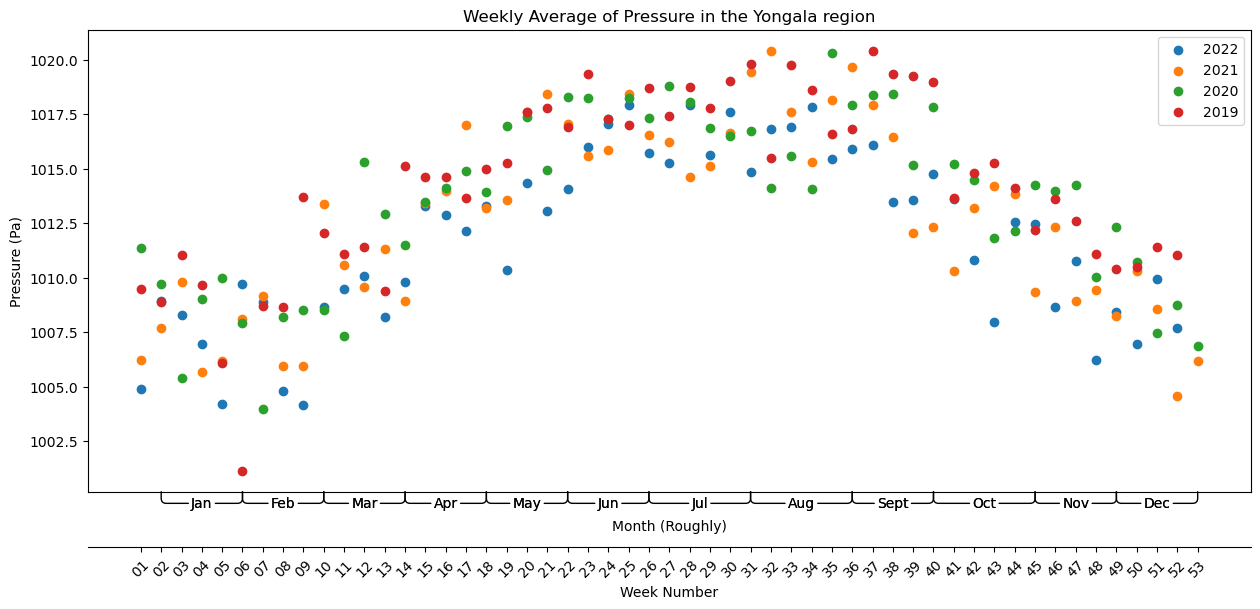

In [70]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(df_2022_weekly["WEEK"], df_2022_weekly["VALUES"], label="2022")
ax.scatter(df_2021_weekly["WEEK"], df_2021_weekly["VALUES"], label="2021")
ax.scatter(df_2020_weekly["WEEK"], df_2020_weekly["VALUES"], label="2020")
ax.scatter(df_2019_weekly["WEEK"], df_2019_weekly["VALUES"], label="2019")
# ax.scatter(df_2018_weekly['WEEK'], df_2018_weekly['VALUES'], label='2018');
# ax.scatter(df_2017_weekly['WEEK'], df_2017_weekly['VALUES'], label='2017');
# ax.scatter(df_2016_weekly['WEEK'], df_2016_weekly['VALUES'], label='2016');
# ax.scatter(df_2015_weekly['WEEK'], df_2015_weekly['VALUES'], label='2015');
ax.legend()
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Week Number")
ax.set_ylabel("Average Pressure (Pa)")
ax.set_title("Weekly Average of Pressure in the Yongala region")

groups = [
    ("Jan", (0, int(df_2022_weekly["WEEK"][4]))),
    ("Feb", (int(df_2022_weekly["WEEK"][4]), int(df_2022_weekly["WEEK"][8]))),
    ("Mar", (int(df_2022_weekly["WEEK"][8]), int(df_2022_weekly["WEEK"][12]))),
    ("Apr", (int(df_2022_weekly["WEEK"][12]), int(df_2022_weekly["WEEK"][16]))),
    ("May", (int(df_2022_weekly["WEEK"][16]), int(df_2022_weekly["WEEK"][20]))),
    ("Jun", (int(df_2022_weekly["WEEK"][20]), int(df_2022_weekly["WEEK"][24]))),
    ("Jul", (int(df_2022_weekly["WEEK"][24]), int(df_2022_weekly["WEEK"][29]))),
    ("Aug", (int(df_2022_weekly["WEEK"][29]), int(df_2022_weekly["WEEK"][34]))),
    ("Sept", (int(df_2022_weekly["WEEK"][34]), int(df_2022_weekly["WEEK"][38]))),
    ("Oct", (int(df_2022_weekly["WEEK"][38]), int(df_2022_weekly["WEEK"][43]))),
    ("Nov", (int(df_2022_weekly["WEEK"][43]), int(df_2022_weekly["WEEK"][47]))),
    ("Dec", (int(df_2022_weekly["WEEK"][47]), int(df_2022_weekly["WEEK"][51]))),
]
ax.spines["bottom"].set_position(("outward", 40))

make_second_bottom_spine(label="Month (Roughly)")

for name, xspan in groups:
    annotate_group(name, xspan)

#### Sea Water Turbidity


In [316]:
filename = "/home/jovyan/visualization/dhiraj/data/clean/sea_water_turbidity.csv"
df = pd.read_csv(filename)
df.columns
df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month

df["YEAR"].value_counts()

Index(['TIME', 'VALUES'], dtype='object')

##### NOT enough data


#### Mass Concentration of Chlorophyll in Sea Water


In [41]:
# filename = "/home/jovyan/visualization/dhiraj/data/clean/mass_concentration_of_chlorophyll_in_sea_water.csv"
filename = "data/clean/mass_concentration_of_chlorophyll_in_sea_water.csv"
df = pd.read_csv(filename)
df.columns

Index(['TIME', 'VALUES'], dtype='object')

In [43]:
df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month
df["YEAR"].value_counts()

YEAR
2017    102854
2018    100524
2014     81886
2016     57510
2015     44628
2013     34420
2019     27598
2010      7841
2020      4160
2011      2136
Name: count, dtype: int64

In [57]:
df_2020 = df[df["YEAR"] == 2020]
df_2020 = df_2020.reset_index(drop=True)
df_2020.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2020["WEEK"] = pd.to_datetime(df_2020["TIME"]).dt.strftime("%V")
df_2020_weekly = (
    df_2020[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2019 = df[df["YEAR"] == 2019]
df_2019 = df_2019.reset_index(drop=True)
df_2019.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2019["WEEK"] = pd.to_datetime(df_2019["TIME"]).dt.strftime("%V")
df_2019_weekly = (
    df_2019[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2018 = df[df["YEAR"] == 2018]
df_2018 = df_2018.reset_index(drop=True)
df_2018.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2018["WEEK"] = pd.to_datetime(df_2018["TIME"]).dt.strftime("%V")
df_2018_weekly = (
    df_2018[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2017 = df[df["YEAR"] == 2017]
df_2017 = df_2017.reset_index(drop=True)
df_2017.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2017["WEEK"] = pd.to_datetime(df_2017["TIME"]).dt.strftime("%V")
df_2017_weekly = (
    df_2017[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2016 = df[df["YEAR"] == 2016]
df_2016 = df_2016.reset_index(drop=True)
df_2016.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2016["WEEK"] = pd.to_datetime(df_2016["TIME"]).dt.strftime("%V")
df_2016_weekly = (
    df_2016[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2015 = df[df["YEAR"] == 2015]
df_2015 = df_2015.reset_index(drop=True)
df_2015.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2015["WEEK"] = pd.to_datetime(df_2015["TIME"]).dt.strftime("%V")
df_2015_weekly = (
    df_2015[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

Text(0.5, 1.0, 'Weekly Average Percentage of Relative Hummidity in the Yongala region')

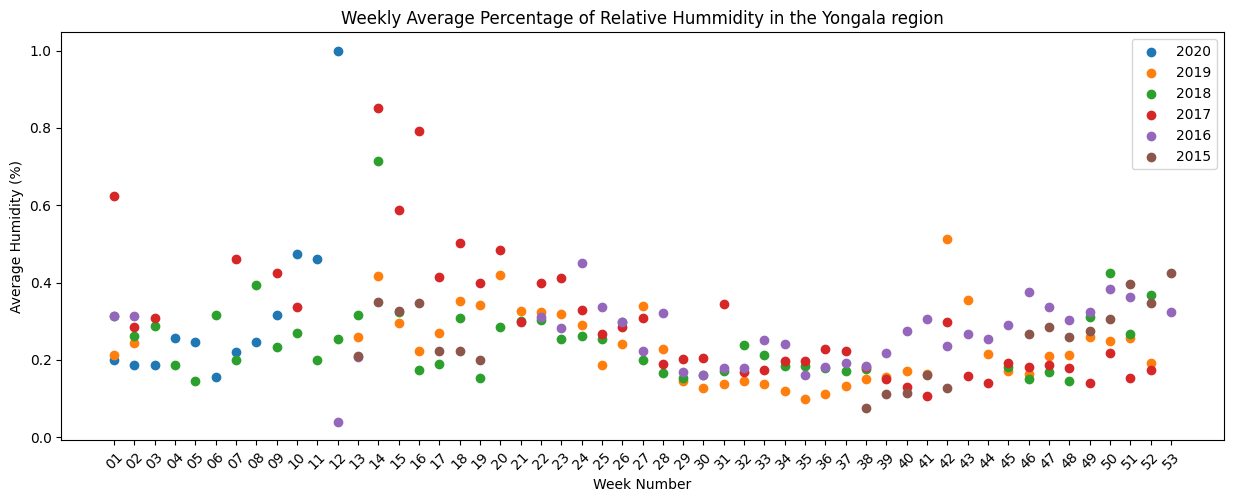

In [58]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplots_adjust(bottom=0.2)

ax.scatter(df_2020_weekly["WEEK"], df_2020_weekly["VALUES"], label="2020")
ax.scatter(df_2019_weekly["WEEK"], df_2019_weekly["VALUES"], label="2019")
ax.scatter(df_2018_weekly["WEEK"], df_2018_weekly["VALUES"], label="2018")
ax.scatter(df_2017_weekly["WEEK"], df_2017_weekly["VALUES"], label="2017")
ax.scatter(df_2016_weekly["WEEK"], df_2016_weekly["VALUES"], label="2016")
ax.scatter(df_2015_weekly["WEEK"], df_2015_weekly["VALUES"], label="2015")

ax.legend()
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Week Number")
ax.set_ylabel("Average Humidity (%)")
ax.set_title("Weekly Average Percentage of Relative Hummidity in the Yongala region")

#### Mole Concentration of Dissolved Molecular Oxygen in Sea Water


In [320]:
filename = "/home/jovyan/visualization/dhiraj/data/clean/mole_concentration_of_dissolved_molecular_oxygen_in_sea_water.csv"
df = pd.read_csv(filename)
df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month
df["YEAR"].value_counts()

YEAR
2018    33590
2015    32402
2017    31557
2014    29161
2016    27224
2013    24260
2012    18271
2019    12863
2010    12646
2011     2136
Name: count, dtype: int64

#### Percentage of Relative Humidity


In [14]:
# filename = (
#     "/home/jovyan/visualization/dhiraj/data/clean/percentage_relative_humidity.csv"
# )
filename = "data/clean/percentage_relative_humidity.csv"
df = pd.read_csv(filename)
df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month
df["YEAR"].value_counts()

YEAR
2021    52389
2020    52368
2022    52257
2018    52114
2019    52095
2017    50366
2016    41463
2015    40755
2014    35146
2023    18872
2013    13524
2010     6755
2011     2263
Name: count, dtype: int64

In [15]:
df_2022 = df[df["YEAR"] == 2022]
df_2022 = df_2022.reset_index(drop=True)
df_2022.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2022["WEEK"] = pd.to_datetime(df_2022["TIME"]).dt.strftime("%V")
df_2022_weekly = (
    df_2022[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2021 = df[df["YEAR"] == 2021]
df_2021 = df_2021.reset_index(drop=True)
df_2021.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2021["WEEK"] = pd.to_datetime(df_2021["TIME"]).dt.strftime("%V")
df_2021_weekly = (
    df_2021[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2020 = df[df["YEAR"] == 2020]
df_2020 = df_2020.reset_index(drop=True)
df_2020.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2020["WEEK"] = pd.to_datetime(df_2020["TIME"]).dt.strftime("%V")
df_2020_weekly = (
    df_2020[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2019 = df[df["YEAR"] == 2019]
df_2019 = df_2019.reset_index(drop=True)
df_2019.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2019["WEEK"] = pd.to_datetime(df_2019["TIME"]).dt.strftime("%V")
df_2019_weekly = (
    df_2019[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2018 = df[df["YEAR"] == 2018]
df_2018 = df_2018.reset_index(drop=True)
df_2018.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2018["WEEK"] = pd.to_datetime(df_2018["TIME"]).dt.strftime("%V")
df_2018_weekly = (
    df_2018[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2017 = df[df["YEAR"] == 2017]
df_2017 = df_2017.reset_index(drop=True)
df_2017.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2017["WEEK"] = pd.to_datetime(df_2017["TIME"]).dt.strftime("%V")
df_2017_weekly = (
    df_2017[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2016 = df[df["YEAR"] == 2016]
df_2016 = df_2016.reset_index(drop=True)
df_2016.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2016["WEEK"] = pd.to_datetime(df_2016["TIME"]).dt.strftime("%V")
df_2016_weekly = (
    df_2016[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2015 = df[df["YEAR"] == 2015]
df_2015 = df_2015.reset_index(drop=True)
df_2015.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2015["WEEK"] = pd.to_datetime(df_2015["TIME"]).dt.strftime("%V")
df_2015_weekly = (
    df_2015[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

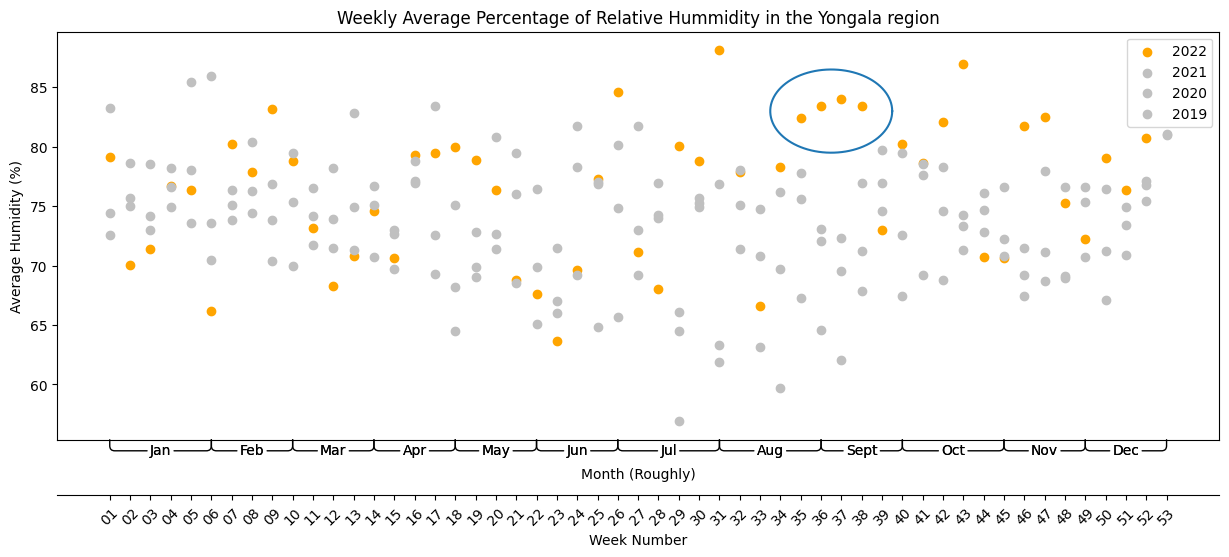

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplots_adjust(bottom=0.2)
ax.scatter(df_2022_weekly["WEEK"], df_2022_weekly["VALUES"], label="2022", c="orange")
ax.scatter(df_2021_weekly["WEEK"], df_2021_weekly["VALUES"], label="2021", c="silver")
ax.scatter(df_2020_weekly["WEEK"], df_2020_weekly["VALUES"], label="2020", c="silver")
ax.scatter(df_2019_weekly["WEEK"], df_2019_weekly["VALUES"], label="2019", c="silver")
# ax.scatter(df_2018_weekly['WEEK'], df_2018_weekly['VALUES'], label='2018', c='silver');
# ax.scatter(df_2017_weekly['WEEK'], df_2017_weekly['VALUES'], label='2017', c='silver');
# ax.scatter(df_2016_weekly['WEEK'], df_2016_weekly['VALUES'], label='2016', c='silver');
# ax.scatter(df_2015_weekly['WEEK'], df_2015_weekly['VALUES'], label='2015', c='silver');
ax.legend()
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Week Number")
ax.set_ylabel("Average Humidity (%)")
ax.set_title("Weekly Average Percentage of Relative Hummidity in the Yongala region")

groups = [
    ("Jan", (0, int(df_2022_weekly["WEEK"][4]))),
    ("Feb", (int(df_2022_weekly["WEEK"][4]), int(df_2022_weekly["WEEK"][8]))),
    ("Mar", (int(df_2022_weekly["WEEK"][8]), int(df_2022_weekly["WEEK"][12]))),
    ("Apr", (int(df_2022_weekly["WEEK"][12]), int(df_2022_weekly["WEEK"][16]))),
    ("May", (int(df_2022_weekly["WEEK"][16]), int(df_2022_weekly["WEEK"][20]))),
    ("Jun", (int(df_2022_weekly["WEEK"][20]), int(df_2022_weekly["WEEK"][24]))),
    ("Jul", (int(df_2022_weekly["WEEK"][24]), int(df_2022_weekly["WEEK"][29]))),
    ("Aug", (int(df_2022_weekly["WEEK"][29]), int(df_2022_weekly["WEEK"][34]))),
    ("Sept", (int(df_2022_weekly["WEEK"][34]), int(df_2022_weekly["WEEK"][38]))),
    ("Oct", (int(df_2022_weekly["WEEK"][38]), int(df_2022_weekly["WEEK"][43]))),
    ("Nov", (int(df_2022_weekly["WEEK"][43]), int(df_2022_weekly["WEEK"][47]))),
    ("Dec", (int(df_2022_weekly["WEEK"][47]), int(df_2022_weekly["WEEK"][51]))),
]
ax.spines["bottom"].set_position(("outward", 40))

make_second_bottom_spine(label="Month (Roughly)")

for name, xspan in groups:
    annotate_group(name, xspan)

u = 35.5  # x-position of the center
v = 83  # y-position of the center
a = 3  # radius on the x-axis
b = 3.5  # radius on the y-axis

t = np.linspace(0, 2 * pi, 100)
plt.plot(u + a * np.cos(t), v + b * np.sin(t))

##### Some findings:

- It was the first mass bleaching event caused by heat stress during La Niña conditions, which historically produce cooler summer conditions at the reef, with higher-than-average rainfall and high cloud cover.
- [More information](http://www.bom.gov.au/climate/updates/articles/a020.shtmlv)


In [19]:
df_2017 = df[df["YEAR"] == 2017]
df_2017 = df_2017.reset_index(drop=True)
df_2017.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2017["WEEK"] = pd.to_datetime(df_2017["TIME"]).dt.strftime("%V")
df_2017_weekly = (
    df_2017[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2016 = df[df["YEAR"] == 2016]
df_2016 = df_2016.reset_index(drop=True)
df_2016.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2016["WEEK"] = pd.to_datetime(df_2016["TIME"]).dt.strftime("%V")
df_2016_weekly = (
    df_2016[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2015 = df[df["YEAR"] == 2015]
df_2015 = df_2015.reset_index(drop=True)
df_2015.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2015["WEEK"] = pd.to_datetime(df_2015["TIME"]).dt.strftime("%V")
df_2015_weekly = (
    df_2015[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

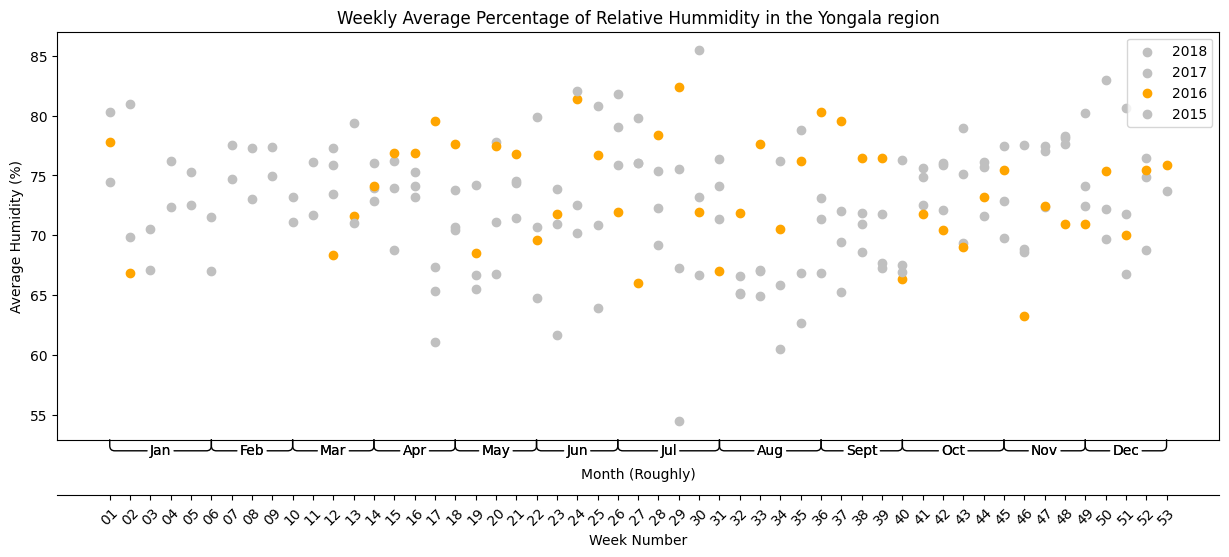

In [20]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplots_adjust(bottom=0.2)
ax.scatter(df_2018_weekly["WEEK"], df_2018_weekly["VALUES"], label="2018", c="silver")
ax.scatter(df_2017_weekly["WEEK"], df_2017_weekly["VALUES"], label="2017", c="silver")
ax.scatter(df_2016_weekly["WEEK"], df_2016_weekly["VALUES"], label="2016", c="orange")
ax.scatter(df_2015_weekly["WEEK"], df_2015_weekly["VALUES"], label="2015", c="silver")
ax.legend()
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Week Number")
ax.set_ylabel("Average Humidity (%)")
ax.set_title("Weekly Average Percentage of Relative Hummidity in the Yongala region")

groups = [
    ("Jan", (0, int(df_2022_weekly["WEEK"][4]))),
    ("Feb", (int(df_2022_weekly["WEEK"][4]), int(df_2022_weekly["WEEK"][8]))),
    ("Mar", (int(df_2022_weekly["WEEK"][8]), int(df_2022_weekly["WEEK"][12]))),
    ("Apr", (int(df_2022_weekly["WEEK"][12]), int(df_2022_weekly["WEEK"][16]))),
    ("May", (int(df_2022_weekly["WEEK"][16]), int(df_2022_weekly["WEEK"][20]))),
    ("Jun", (int(df_2022_weekly["WEEK"][20]), int(df_2022_weekly["WEEK"][24]))),
    ("Jul", (int(df_2022_weekly["WEEK"][24]), int(df_2022_weekly["WEEK"][29]))),
    ("Aug", (int(df_2022_weekly["WEEK"][29]), int(df_2022_weekly["WEEK"][34]))),
    ("Sept", (int(df_2022_weekly["WEEK"][34]), int(df_2022_weekly["WEEK"][38]))),
    ("Oct", (int(df_2022_weekly["WEEK"][38]), int(df_2022_weekly["WEEK"][43]))),
    ("Nov", (int(df_2022_weekly["WEEK"][43]), int(df_2022_weekly["WEEK"][47]))),
    ("Dec", (int(df_2022_weekly["WEEK"][47]), int(df_2022_weekly["WEEK"][51]))),
]
ax.spines["bottom"].set_position(("outward", 40))

make_second_bottom_spine(label="Month (Roughly)")

for name, xspan in groups:
    annotate_group(name, xspan)

#### Rainfall Duration


In [88]:
filename = "/home/jovyan/visualization/dhiraj/data/clean/rainfall_duration.csv"
df = pd.read_csv(filename)
df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month
df["YEAR"].value_counts()

YEAR
2021    52389
2020    52370
2022    52263
2018    52114
2019    52109
2017    50366
2016    41463
2015    40756
2014    35146
2023    18865
2013    13524
2010     6755
2011     2263
Name: count, dtype: int64

In [89]:
df_2022 = df[df["YEAR"] == 2022]
df_2022 = df_2022.reset_index(drop=True)
df_2022.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2022["WEEK"] = pd.to_datetime(df_2022["TIME"]).dt.strftime("%V")
df_2022_weekly = (
    df_2022[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2021 = df[df["YEAR"] == 2021]
df_2021 = df_2021.reset_index(drop=True)
df_2021.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2021["WEEK"] = pd.to_datetime(df_2021["TIME"]).dt.strftime("%V")
df_2021_weekly = (
    df_2021[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2020 = df[df["YEAR"] == 2020]
df_2020 = df_2020.reset_index(drop=True)
df_2020.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2020["WEEK"] = pd.to_datetime(df_2020["TIME"]).dt.strftime("%V")
df_2020_weekly = (
    df_2020[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2019 = df[df["YEAR"] == 2019]
df_2019 = df_2019.reset_index(drop=True)
df_2019.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2019["WEEK"] = pd.to_datetime(df_2019["TIME"]).dt.strftime("%V")
df_2019_weekly = (
    df_2019[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2018 = df[df["YEAR"] == 2018]
df_2018 = df_2018.reset_index(drop=True)
df_2018.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2018["WEEK"] = pd.to_datetime(df_2018["TIME"]).dt.strftime("%V")
df_2018_weekly = (
    df_2018[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2017 = df[df["YEAR"] == 2017]
df_2017 = df_2017.reset_index(drop=True)
df_2017.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2017["WEEK"] = pd.to_datetime(df_2017["TIME"]).dt.strftime("%V")
df_2017_weekly = (
    df_2017[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2016 = df[df["YEAR"] == 2016]
df_2016 = df_2016.reset_index(drop=True)
df_2016.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2016["WEEK"] = pd.to_datetime(df_2016["TIME"]).dt.strftime("%V")
df_2016_weekly = (
    df_2016[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2015 = df[df["YEAR"] == 2015]
df_2015 = df_2015.reset_index(drop=True)
df_2015.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2015["WEEK"] = pd.to_datetime(df_2015["TIME"]).dt.strftime("%V")
df_2015_weekly = (
    df_2015[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

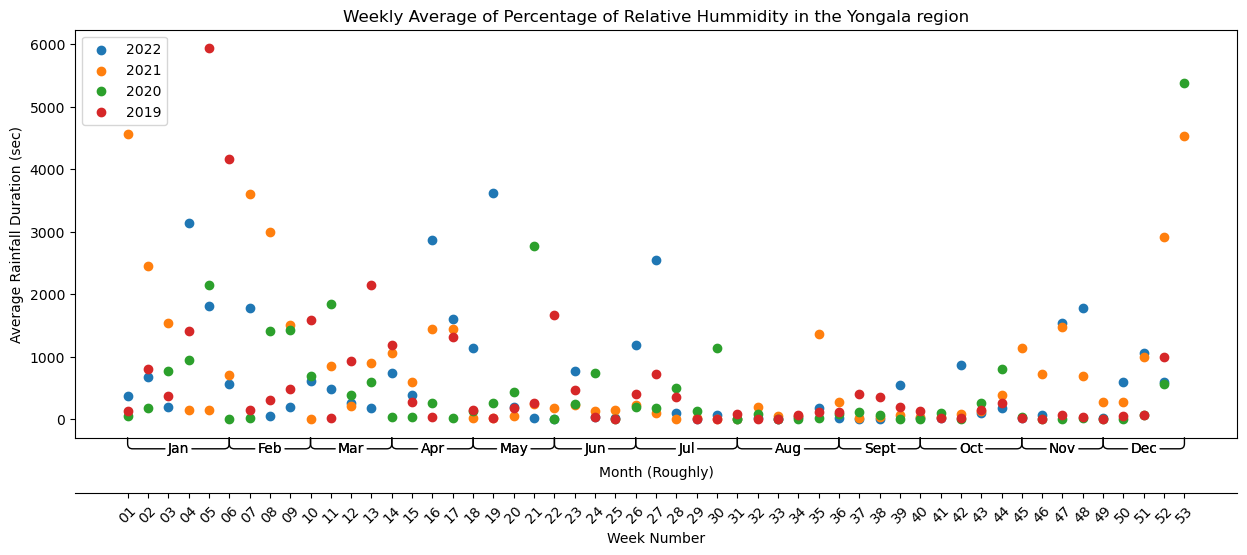

In [101]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplots_adjust(bottom=0.2)
ax.scatter(df_2022_weekly["WEEK"], df_2022_weekly["VALUES"], label="2022")
ax.scatter(df_2021_weekly["WEEK"], df_2021_weekly["VALUES"], label="2021")
ax.scatter(df_2020_weekly["WEEK"], df_2020_weekly["VALUES"], label="2020")
ax.scatter(df_2019_weekly["WEEK"], df_2019_weekly["VALUES"], label="2019")
# ax.scatter(df_2018_weekly['WEEK'], df_2018_weekly['VALUES'], label='2018', c='silver');
# ax.scatter(df_2017_weekly['WEEK'], df_2017_weekly['VALUES'], label='2017', c='silver');
# ax.scatter(df_2016_weekly['WEEK'], df_2016_weekly['VALUES'], label='2016', c='silver');
# ax.scatter(df_2015_weekly['WEEK'], df_2015_weekly['VALUES'], label='2015', c='silver');
ax.legend()
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Week Number")
ax.set_ylabel("Average Rainfall Duration (sec)")
ax.set_title("Weekly Average Rainfall Duration in the Yongala region")

groups = [
    ("Jan", (0, int(df_2022_weekly["WEEK"][4]))),
    ("Feb", (int(df_2022_weekly["WEEK"][4]), int(df_2022_weekly["WEEK"][8]))),
    ("Mar", (int(df_2022_weekly["WEEK"][8]), int(df_2022_weekly["WEEK"][12]))),
    ("Apr", (int(df_2022_weekly["WEEK"][12]), int(df_2022_weekly["WEEK"][16]))),
    ("May", (int(df_2022_weekly["WEEK"][16]), int(df_2022_weekly["WEEK"][20]))),
    ("Jun", (int(df_2022_weekly["WEEK"][20]), int(df_2022_weekly["WEEK"][24]))),
    ("Jul", (int(df_2022_weekly["WEEK"][24]), int(df_2022_weekly["WEEK"][29]))),
    ("Aug", (int(df_2022_weekly["WEEK"][29]), int(df_2022_weekly["WEEK"][34]))),
    ("Sept", (int(df_2022_weekly["WEEK"][34]), int(df_2022_weekly["WEEK"][38]))),
    ("Oct", (int(df_2022_weekly["WEEK"][38]), int(df_2022_weekly["WEEK"][43]))),
    ("Nov", (int(df_2022_weekly["WEEK"][43]), int(df_2022_weekly["WEEK"][47]))),
    ("Dec", (int(df_2022_weekly["WEEK"][47]), int(df_2022_weekly["WEEK"][51]))),
]
ax.spines["bottom"].set_position(("outward", 40))

make_second_bottom_spine(label="Month (Roughly)")

for name, xspan in groups:
    annotate_group(name, xspan)

#### Sea Water Pressure


In [103]:
filename = "/home/jovyan/visualization/dhiraj/data/clean/sea_water_pressure.csv"
df = pd.read_csv(filename)
df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month
df["YEAR"].value_counts()

YEAR
2010    12674
2011     2137
Name: count, dtype: int64

#### Sea Water Salinity


In [36]:
# filename = "/home/jovyan/visualization/dhiraj/data/clean/sea_water_salinity.csv"
filename = "data/clean/sea_water_salinity.csv"
df = pd.read_csv(filename)
df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month
df["YEAR"].value_counts()

YEAR
2018    61908
2017    51724
2014    42030
2016    29588
2015    21832
2013    17994
2010    12680
2019     6853
2011     2137
Name: count, dtype: int64

In [37]:
df.head()

TIME  VALUES        DATE  YEAR  MONTH
0  2010-11-01 06:05:00   35.25  2010-11-01  2010     11
1  2010-11-01 07:05:00   35.25  2010-11-01  2010     11
2  2010-11-01 07:20:00   35.25  2010-11-01  2010     11
3  2010-11-01 07:35:00   35.25  2010-11-01  2010     11
4  2010-11-01 07:50:00   35.25  2010-11-01  2010     11

In [38]:
df_2018 = df[df["YEAR"] == 2018]
df_2018 = df_2018.reset_index(drop=True)
df_2018.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2018["WEEK"] = pd.to_datetime(df_2018["TIME"]).dt.strftime("%V")
df_2018_weekly = (
    df_2018[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2017 = df[df["YEAR"] == 2017]
df_2017 = df_2017.reset_index(drop=True)
df_2017.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2017["WEEK"] = pd.to_datetime(df_2017["TIME"]).dt.strftime("%V")
df_2017_weekly = (
    df_2017[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

Text(0.5, 1.0, 'Weekly Average Percentage of Relative Hummidity in the Yongala region')

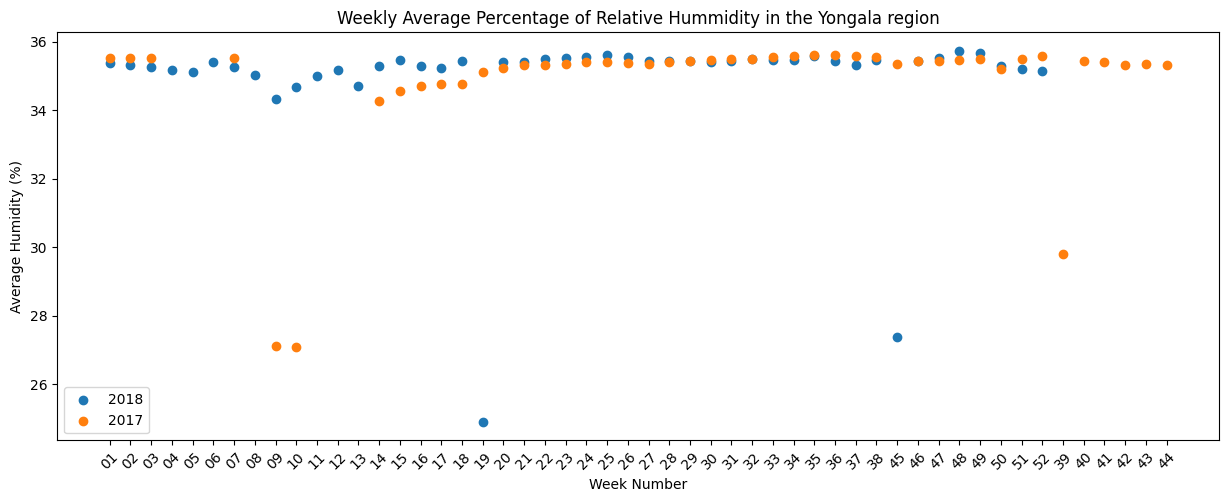

In [40]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplots_adjust(bottom=0.2)
# ax.scatter(df_2022_weekly["WEEK"], df_2022_weekly["VALUES"], label="2022", c="orange")
# ax.scatter(df_2021_weekly["WEEK"], df_2021_weekly["VALUES"], label="2021", c="silver")
# ax.scatter(df_2020_weekly["WEEK"], df_2020_weekly["VALUES"], label="2020", c="silver")
# ax.scatter(df_2019_weekly["WEEK"], df_2019_weekly["VALUES"], label="2019", c="silver")
ax.scatter(df_2018_weekly["WEEK"], df_2018_weekly["VALUES"], label="2018")
ax.scatter(df_2017_weekly["WEEK"], df_2017_weekly["VALUES"], label="2017")

ax.legend()
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Week Number")
ax.set_ylabel("Average Humidity (%)")
ax.set_title("Weekly Average Percentage of Relative Hummidity in the Yongala region")

#### Sea Water Temperature


In [105]:
filename = "/home/jovyan/visualization/dhiraj/data/clean/sea_water_temperature.csv"
df = pd.read_csv(filename)
df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month
df["YEAR"].value_counts()

YEAR
2010    24347
2011     2179
Name: count, dtype: int64